import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


In [2]:
from tensorflow.keras import datasets

In [3]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

In [4]:
X_train.ndim

4

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [7]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
y_train.shape

(50000, 1)

In [9]:
y_train[0]

array([6], dtype=uint8)

In [10]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [11]:
X_train[0].shape

(32, 32, 3)

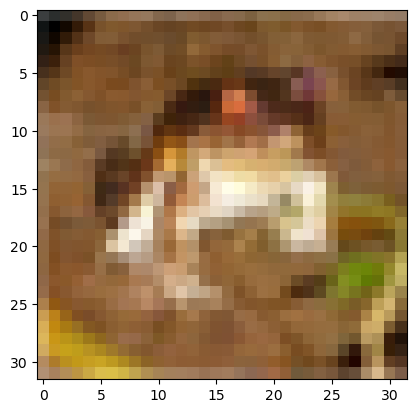

In [12]:
plt.imshow(X_train[0])
plt.show()

In [13]:
y_train[0]

6

In [14]:
categories = ['airplane','automobile','bird','cat','deer','dog','frog','ship','truck']

In [15]:
#categories[y_train[10]]

In [16]:
def plot_image(X,y,index):
    plt.imshow(X[index])
    plt.xlabel(categories[y[index]])
    plt.show()   

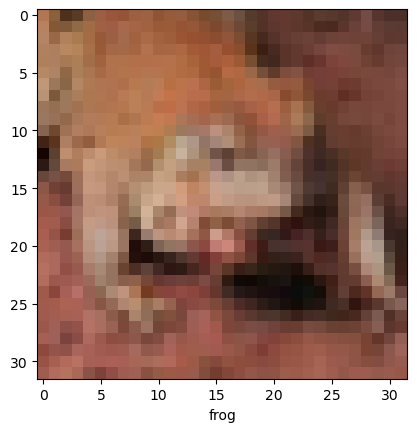

In [17]:
plot_image(X_test,y_test,5)

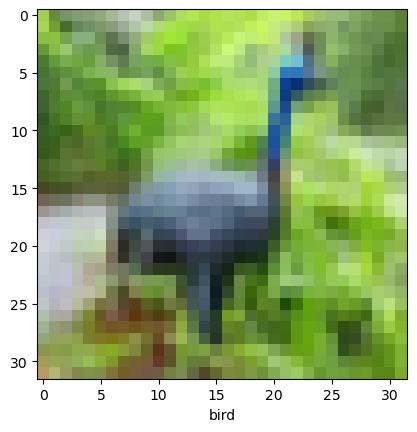

In [18]:
plot_image(X_train,y_train,6)

In [22]:
X_train =X_train/255
X_test = X_test/255

In [24]:
X_train.shape

(50000, 32, 32, 3)

In [25]:
X_train.flatten()

array([0.23137255, 0.24313725, 0.24705882, ..., 0.63921569, 0.63921569,
       0.63137255])

In [28]:
ann = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation = 'relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

In [30]:
ann.compile(optimizer="adam",loss='sparse_categorical_crossentropy',metrics=["Accuracy"])

In [32]:
ann.fit(X_train,y_train,epochs = 3)

Epoch 1/3
1563/1563 [==============================] - 398s 253ms/step - loss: 1.8996 - Accuracy: 0.3267
Epoch 2/3
1563/1563 [==============================] - 389s 249ms/step - loss: 1.6750 - Accuracy: 0.4000
Epoch 3/3
1563/1563 [==============================] - 371s 237ms/step - loss: 1.5945 - Accuracy: 0.4304


In [51]:
cnn = keras.Sequential([
    keras.layers.Conv2D(input_shape=(32,32,3),filters = 32,kernel_size = (3,3),activation = "relu",padding="same"),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters = 64,kernel_size = (3,3),activation = 'relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(3000,activation ="relu"),
    keras.layers.Dense(1000,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")   
])

In [53]:
cnn.compile(optimizer="adam",loss='sparse_categorical_crossentropy',metrics=["Accuracy"])

In [54]:
cnn.fit(X_train,y_train,epochs = 3)

Epoch 1/3
1563/1563 [==============================] - 434s 276ms/step - loss: 1.3096 - Accuracy: 0.5300
Epoch 2/3
1563/1563 [==============================] - 445s 285ms/step - loss: 0.8909 - Accuracy: 0.6873
Epoch 3/3
1563/1563 [==============================] - 444s 284ms/step - loss: 0.6466 - Accuracy: 0.7708
